In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator




In [27]:
train = pd.read_csv('E:\Project\MachienLearning\Digit-Recognizer\Data/train.csv')

In [28]:
test = pd.read_csv('E:\Project\MachienLearning\Digit-Recognizer\Data/test.csv')

In [29]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

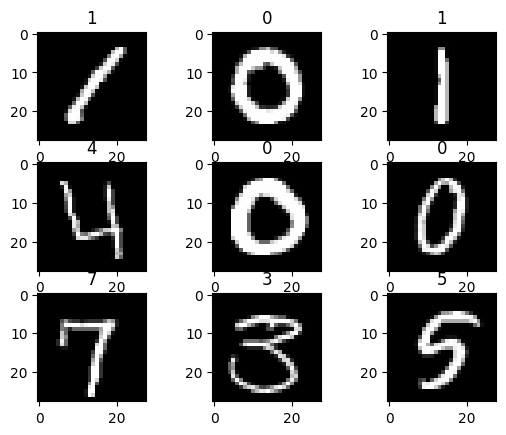

In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [32]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [33]:
from keras.utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [34]:
seed = 43
np.random.seed(seed)

In [35]:
from keras.models import  Sequential
from keras.layers import  Lambda , Dense, Flatten, Dropout, Conv2D
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [36]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [37]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)


In [38]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28,28,1)),)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2892\4071447051.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,


37800/37800 [==============================] - 16s 406us/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0565 - val_accuracy: 0.9831


In [47]:
predictions = model.predict(X_test, verbose=0)

In [48]:
y_pred_classes = np.argmax(predictions, axis=-1)

In [49]:
y_pred_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [50]:
sample_submission_df = pd.read_csv('E:\Project\MachienLearning\Digit-Recognizer\Data\sample_submission.csv')
sample_submission_df['Label'] = y_pred_classes
sample_submission_df.to_csv('E:\Project\MachienLearning\Digit-Recognizer\Submissions\submission_CNN.csv', index=False)
sample_submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
